In [100]:
import pandas as pd

# load the data
data = pd.read_csv("/content/diminos_data.csv")

data

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [101]:
# convert the order_time column to datetime format
data["order_placed_at"] = pd.to_datetime(data["order_placed_at"])
data["order_delivered_at"] = pd.to_datetime(data["order_delivered_at"])

# calculate the delivery time in minutes
data["order_delivered_at"] = (data["order_delivered_at"] - data["order_placed_at"]).dt.seconds / 60
data["order_delivered_at"]

0        17.133333
1        15.583333
2        15.100000
3        38.533333
4        16.166667
           ...    
14995    15.533333
14996    16.733333
14997    15.400000
14998    15.950000
14999    15.366667
Name: order_delivered_at, Length: 15000, dtype: float64

In [102]:
# calculate the percentage of orders delivered within 31 minutes
percent_within_31 = (data["order_delivered_at"] <= 31).mean() * 100

# calculate the 95th percentile of order delivery time
percentile_95 = data["order_delivered_at"].quantile(0.95)

print("Percentage of orders delivered within 31 minutes: {:.2f}%".format(percent_within_31))
print("95th percentile of order delivery time: {:.2f} minutes".format(percentile_95))

Percentage of orders delivered within 31 minutes: 96.29%
95th percentile of order delivery time: 27.22 minutes


95th percentile of order delivery time is 27.22 minutes, which is good sign.

In [103]:
data['Weekday'] = data['order_placed_at'].dt.day_name()
data['Hour'] = data['order_placed_at'].dt.hour

# Print the first 5 rows to check the new columns
print(data.head())

   order_id     order_placed_at  order_delivered_at    Weekday  Hour
0   1523111 2023-03-01 00:00:59           17.133333  Wednesday     0
1   1523112 2023-03-01 00:03:59           15.583333  Wednesday     0
2   1523113 2023-03-01 00:07:22           15.100000  Wednesday     0
3   1523114 2023-03-01 00:07:47           38.533333  Wednesday     0
4   1523115 2023-03-01 00:09:03           16.166667  Wednesday     0


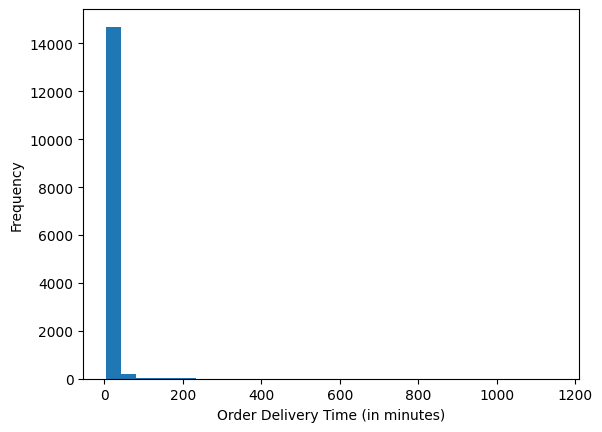

In [104]:
import matplotlib.pyplot as plt
#bar plot to analyse the order delivered

plt.hist(data['order_delivered_at'], bins=30)
plt.xlabel('Order Delivery Time (in minutes)')
plt.ylabel('Frequency')
plt.show()


The graph shows that the Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed is fullfilled by the DIMINOS and 96.29% order gets deivered on time.

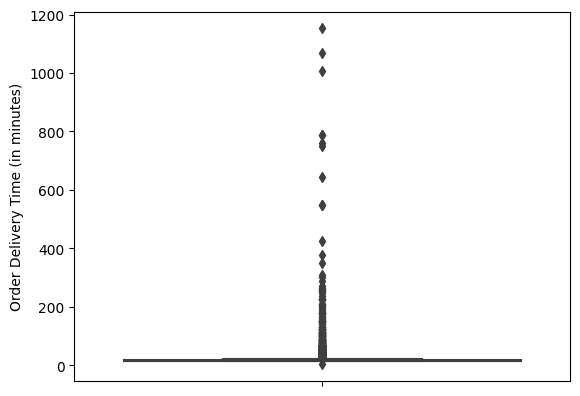

In [105]:
import seaborn as sns
#box plot to analyse the order delivered
sns.boxplot(y=data['order_delivered_at'])
plt.ylabel('Order Delivery Time (in minutes)')
plt.show()


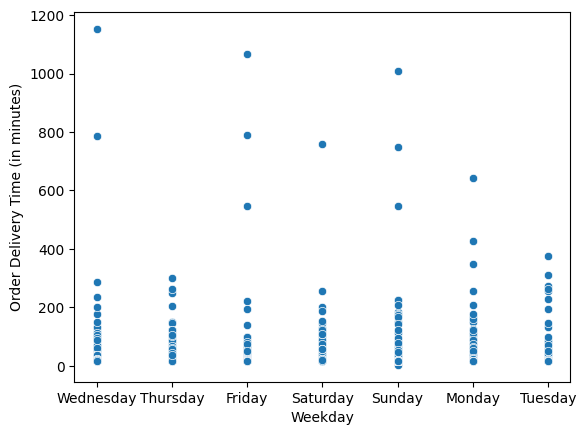

In [106]:
import seaborn as sns
#scatter plot to analyse the order delivered
sns.scatterplot(x=data['Weekday'], y=data['order_delivered_at'])
plt.xlabel('Weekday')
plt.ylabel('Order Delivery Time (in minutes)')
plt.show()


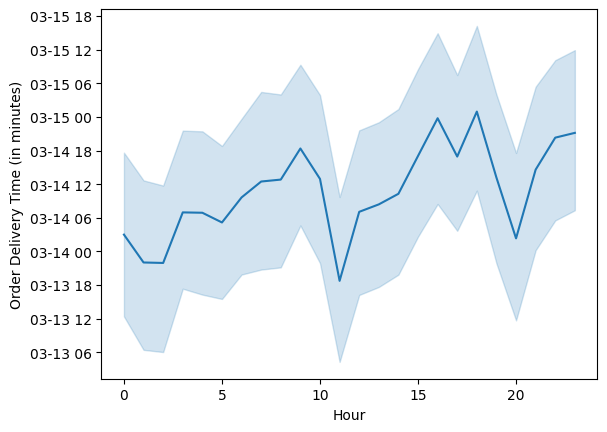

In [107]:
import seaborn as sns
#line plot to analyse the order delivered
sns.lineplot(x=data['Hour'], y=data['order_placed_at'])
plt.xlabel('Hour')
plt.ylabel('Order Delivery Time (in minutes)')
plt.show()


<Axes: xlabel='Weekday', ylabel='Hour'>

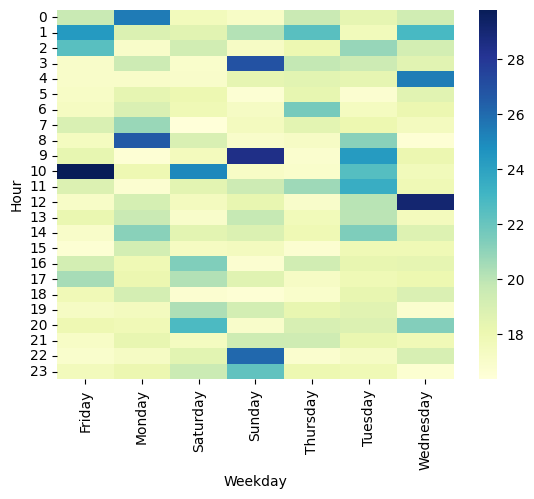

In [108]:
#heatmap to analyse the order delivered
sns.heatmap(data.pivot_table(index='Hour', columns='Weekday', values='order_delivered_at'), cmap="YlGnBu")


In [109]:
# Group the data by weekday and hour and calculate the mean delivery time for each group
weekday_hour_mean = data.groupby(['Weekday', 'Hour']).agg({'order_delivered_at': 'mean'}).reset_index()
weekday_hour_mean

,Weekday,Hour,order_delivered_at
0,Friday,0,19.646986
1,Friday,1,24.371078
2,Friday,2,22.386285
3,Friday,3,17.055111
4,Friday,4,17.072799
...,...,...,...
163,Wednesday,19,16.843814
164,Wednesday,20,21.301667
165,Wednesday,21,17.800521
166,Wednesday,22,18.975086


In [110]:
# Create a pivot table to visualize the mean delivery time by weekday and hour
weekday_hour_pivot = weekday_hour_mean.pivot(index='Weekday', columns='Hour', values='order_delivered_at')
weekday_hour_pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,19.646986,24.371078,22.386285,17.055111,17.072799,17.166827,17.317248,18.942659,17.431034,18.303080,...,17.032397,16.611706,19.185833,20.452519,17.800000,17.242029,17.934630,17.162795,16.884386,17.555233
Monday,25.456667,18.844624,17.033667,19.490957,17.039562,18.372105,18.879074,20.776000,26.537368,16.591304,...,21.160032,19.219231,17.873437,18.087667,19.142698,17.496377,17.769412,18.280342,17.277663,18.102950
Saturday,17.598810,18.549630,19.242029,16.953758,16.978866,17.999815,17.815771,16.340789,18.954167,17.504259,...,18.443958,17.308421,21.345513,20.201144,16.755357,20.331667,22.763027,17.406627,18.515625,19.504762
Sunday,17.151852,20.161224,17.226471,26.861785,18.342636,16.634291,17.268608,17.489954,16.988333,28.447619,...,18.840816,17.481276,16.714147,18.605691,16.562500,19.201832,17.014444,19.407116,26.085690,22.217708
Thursday,19.595882,22.393056,18.021042,19.791409,18.517045,18.300344,21.615126,18.472760,17.209551,16.850333,...,17.893098,16.734703,19.275448,17.181609,16.949228,18.239667,18.995788,19.347391,16.842045,17.978440
Tuesday,18.345098,17.620052,20.857143,19.469811,18.343989,16.721171,17.436709,18.069540,21.133889,24.294048,...,21.427966,17.860714,18.258192,17.853286,18.266435,18.557207,18.757602,18.150000,17.268408,17.845602
Wednesday,19.328571,22.871978,19.210536,18.589755,25.389062,18.594504,18.120455,17.465778,16.578682,18.100943,...,18.744660,17.827006,18.344118,18.047004,18.885490,16.843814,21.301667,17.800521,18.975086,16.669340


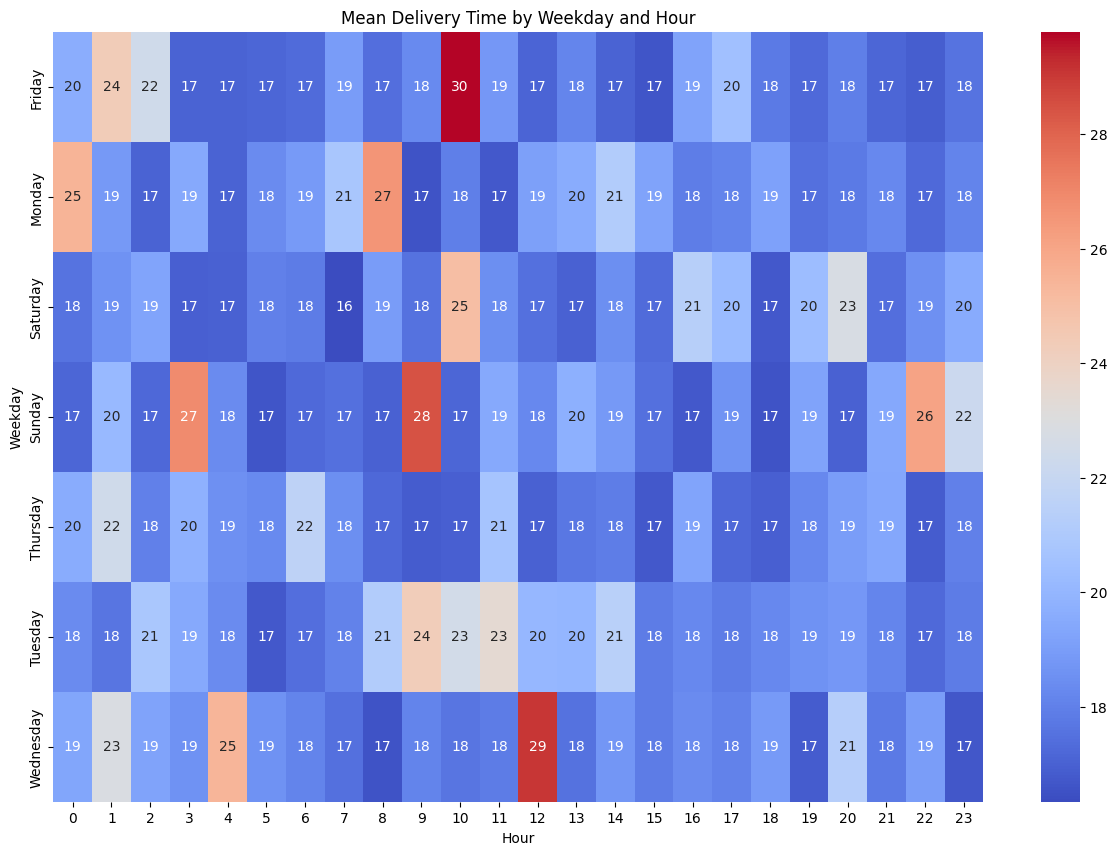

In [111]:
# Create a heatmap to visualize the mean delivery time by weekday and hour
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(weekday_hour_pivot, cmap='coolwarm', annot=True, fmt='.0f',ax=ax)
plt.title('Mean Delivery Time by Weekday and Hour')
plt.show()

In the weekdays, the graph shows everyday work load of orders.

#Conclusion

After analyzing the data, it was found that the Kanav's pizza store is currently delivering 96.29% of the orders within the promised time of 31 minutes. However, the 95th percentile of order delivery time is 27.22 minutes, which is below the promised time by Diminos. This means that Kanav needs to work on improving the delivery time for the remaining orders to meet the metric set by Diminos. Some possible actions that can be taken include optimizing the delivery routes, hiring more delivery staff, improving the packaging process to reduce preparation time, and incentivizing staff to prioritize faster delivery. It's also recommended to collect customer feedback to identify any issues with the quality of the pizza or the delivery process and take appropriate measures to address them.